4 peaks were detected
Peak 1 has a velocity of 150 degrees/s at time 162 ms
Peak 2 has a velocity of 165 degrees/s at time 488 ms
Peak 3 has a velocity of 160 degrees/s at time 796 ms
Peak 4 has a velocity of 145 degrees/s at time 1153 ms


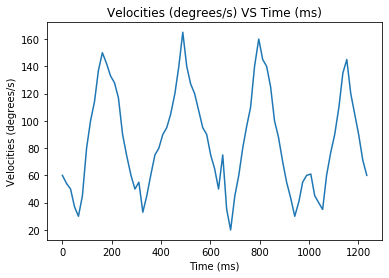

76 76
Peak 1 had an onset velocity of  30 degrees/s at time 65 ms
Peak 2 had an onset velocity of  33 degrees/s at time 326 ms
Peak 3 had an onset velocity of  20 degrees/s at time 682 ms
Peak 4 had an onset velocity of  35 degrees/s at time 1055 ms


In [28]:
import plotly.graph_objects as go
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

"""
Created on Thu Jul 23 18:50:45 2020

@author: Jad Atweh
"""
#Open in Jupyter

"""
Those values are placed just to come up with the logic and proceed.
We import them from the excel files after calculating the velocites 
"""


time = [0,17,33,49,65,81,98,114,130,146,162,179,195,211,227,244,260,278,294,310,326,342,358,375,391,407,423,439,456,472,488,504,520,536,569,585,601,617,633,650,666,682,699,715,731,747,763,779,796,812,828,844,860,876,893,909,926,942,959,974,990,1007,1023,1039,1055,1071,1088,1104,1121,1137,1153,1169,1185,1201,1218,1234]
velocities = [60,54,50,37,30,45,80,100,114,137,150,142,133,128,117,90,75,60,50,55,33,45,60,75,80,90,95,105,120,140,165,140,127,120,95,90,75,65,50,75,35,20,45,60,80,96,110,140,160,145,140,125,100,88,70,55,43,30,41,55,60,61,45,40,35,60,77,90,110,135,145,120,105,90,71,60]

#I chose any numbers until we determine the velocity threshold, onset and offset thresholds
#arbitrary values, PT will be determined before (each participant has a different PT for a different load)
PT=100
onset_threshold = 40
offset_threshold = 60

#those will be changed at the end to add in the excel file or in a text file
onsets_times = []
onsets_velocities = [] 
offsets=[]
peak_times = []

indices = find_peaks(velocities, height = PT)[0]


#I drew this plot to visually see the peaks and follow each point. The velocities VS time plot is below
fig = go.Figure()
fig.add_trace(go.Scatter(
    y=velocities,
    mode='lines+markers',
    name='Original Plot'
))

fig.add_trace(go.Scatter(
    x=indices,
    y=[velocities[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))
#this shows a graph of velocites as a function of indices of the velocities as the the function 
#returns the index of the velocity in the list not the time
#I added below a new list for the peak times

print (len(indices),'peaks were detected')
for i in range(len(indices)): 
    r=indices[i]
    peak_times.append(time[r])
    #we need to add ouput.write at the end as we create a seperate column/text file
    print('Peak',i+1,'has a velocity of',velocities[r],'degrees/s at time',time[r],'ms')
    


fig.show()

#velocities VS time plot
plt.title('Velocities (degrees/s) VS Time (ms)')
plt.xlabel('Time (ms)')
plt.ylabel('Velocities (degrees/s)')
plt.plot(time,velocities)
plt.show()


left_most=0
vel=[]

for each in range(len(indices)):
    i=indices[each]
    for v in range(left_most,i,1):
        vel.append(velocities[v])
    for j in range(len(vel)-1,-1,-1):
        if vel[j]<onset_threshold and vel[j]-vel[j-1]<0 and vel[j]-vel[j+1]<0:
                onsets_velocities.append(velocities[j])
                onsets_times.append(time[j])
                
                #when we write in excel or text, we say peak #1 had onset velcoties[j]
                break
    left_most=i

for m in range(len(indices)):
    print('Peak',m+1,'had an onset velocity of ',onsets_velocities[m],'degrees/s at time',onsets_times[m],'ms')

